#### Deep Learning : AI2100

#### HW1

#### Tanmay Goyal- AI20BTECH11021

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

##### Question 1: Unit Norm Ball

##### Recall the definition of a unit norm ball defined in a normed linear space $(X , ||.||): \vec{\mathcal{B}} = \{x \in X : ||x|| \leq  1\}$. Assume $X = \mathbb{R}^2$

##### a) Write a function that takes accepts p, and plots the $||.||_p$ unit norm ball. Test with integer $p \geq 1$ as well as $0<p<1$.

In [3]:
def unit_norm_ball(p):
    
    x_coord = np.linspace(-2,2,500 , endpoint = False)
    y_coord = np.linspace(-2,2,500 , endpoint = False)

    within_ball_x = []
    within_ball_y = []
    # finding the correct points
    for x in x_coord:
        for y in y_coord:
            norm = np.power(np.abs(x),p) + np.power(np.abs(y) , p)
            norm = np.power(norm , 1/p)

            if norm <= 1:
                within_ball_x.append(x)
                within_ball_y.append(y)

    #  plotting the points
    plt.axis('equal')
    plt.plot(within_ball_x , within_ball_y , 'ro')
    plt.grid(True)
    plt.title("{}-norm ball".format(p))

    return within_ball_x , within_ball_y

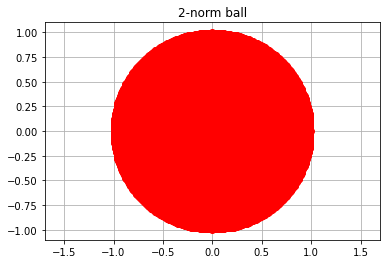

In [4]:
# testing on integer >=1
_ , _ = unit_norm_ball(2)

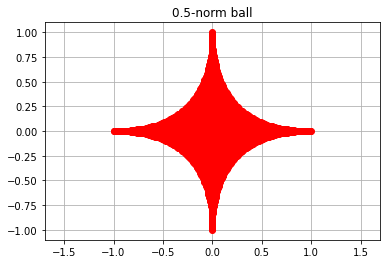

In [5]:
# testing for p between 0 and 1
_ , _ = unit_norm_ball(0.5)

##### b) Claim: unit norm ball for $p \geq 1$ is convex. Is it clear from the unit norm ball plot? What about when $0<p<1$ ?

Yes, the unit norm ball when p >= 1 is convex, which is visible from the plots. At p=1, the plot is diamond-like, which is convex, and the plot becomes squarer as p increases.Finally, at very large values of p,the plot is square, which is again convex. 
In the case when 0 < p < 1,  the plot is not convex, which can be seen when p = 0.5.If we take the points on the x-axis and the y-axis at the complete edges,the line joining them will not lie inside the plot, as we can see in the figure below


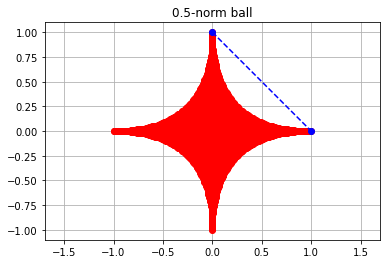

In [6]:
print("Yes, the unit norm ball when p >= 1 is convex, which is visible from the plots. "  
    "At p=1, the plot is diamond-like, which is convex, and the plot becomes squarer as p increases."
    "Finally, at very large values of p,the plot is square, which is again convex. ")

print("In the case when 0 < p < 1,  the plot is not convex, which can be seen when p = 0.5."
 "If we take the points on the x-axis and the y-axis at the complete edges,"
 "the line joining them will not lie inside the plot, as we can see in the figure below")

# obtaining these edge points and plotting them
x , y = unit_norm_ball(0.5)
x = np.array(x)
y = np.array(y)
plt.plot(0 , y.max() , 'bo')
plt.plot(x.max() , 0 , 'bo')
plt.plot((0,y.max()), (x.max(),0) , 'b--') 
plt.show()

##### Question 2: Completeness

##### A metric space $(X,d)$ is said to be complete if all Cauchy Sequences in X converge to a point in X. Show with a numerical example that the space of continious functions defined on the closed interval $[0,1]$, denoted as $C[0,1]$ is incomplete, with respect to the $L1$ norm, i.e $d(f,g) = ||f-g||_1 = \int\limits_0^1 |f(x) - g(x)| \,dx$ for any $f,g \in C[0,1]$. Code the example and show using a plot or numerically.

##### Answer:

Consider the continous sequence of functions:

$f_n(x) = \begin{cases}
0 & 0 \leq x \leq \frac{1}{2} - \frac{1}{n}\\
\frac{n(2x-1) + 2}{4} & \frac{1}{2} - \frac{1}{n} \leq x \leq \frac{1}{2} + \frac{1}{n}\\
1 & \frac{1}{2} + \frac{1}{n} \leq x \leq 1
\end{cases}$

Clearly, $f_n(x)$ is continous for all n.

To prove: $f_n(x)$ is Cauchy with respect to the $L1$ Norm, but does not converge to a function in $C[0,1]$, implying $C[0,1]$ with respect to the $L1$ norm is incomplete.

To show $f_n(x)$ is Cauchy, we show that $\; \forall \epsilon > 0$ ,  $\; \exists N \in \mathbb{N}\;$ such that $\; d(f_n(x) , f_m(x)) < \epsilon$  $\; \forall n,m \geq N $

$\implies \forall \epsilon > 0$ ,  $\; \exists N \in \mathbb{N}$ such that $\int\limits_{0}^1|f_n(x) - f_m(x)| \, dx< \epsilon$  $\; \forall n,m \geq N$

Now, without loss of generality, we assume $n > m$ $\implies $ $\frac{1}{m} > \frac{1}{n}$ and $\frac{m}{n} < 1$

$|f_n(x) - f_m(x)| = \begin{cases}
0 & 0 \leq x \leq \frac{1}{2} - \frac{1}{m}\\
|-\frac{m(2x-1) + 2}{4}| &  \frac{1}{2} - \frac{1}{m} \leq x \leq \frac{1}{2} - \frac{1}{n}\\
|\frac{(n-m)(2x-1)}{4}| & \frac{1}{2} - \frac{1}{n} \leq x \leq \frac{1}{2} + \frac{1}{n}\\
|1 - \frac{m(2x-1) + 2}{4}| & \frac{1}{2} + \frac{1}{n} \leq x \leq \frac{1}{2} + \frac{1}{m}\\
0 & \frac{1}{2} + \frac{1}{m} \leq x \leq 1
\end{cases}$

$ \implies |f_n(x) - f_m(x)|= \begin{cases}
0 & 0 \leq x \leq \frac{1}{2} - \frac{1}{m}\\
\frac{m(2x-1) + 2}{4} &  \frac{1}{2} - \frac{1}{m} \leq x \leq \frac{1}{2} - \frac{1}{n}\\
(n-m)\frac{(1-2x)}{4} & \frac{1}{2} - \frac{1}{n} \leq x \leq \frac{1}{2}\\
(n-m)\frac{(2x-1)}{4} & \frac{1}{2}  \leq x \leq \frac{1}{2} + \frac{1}{n}\\
1 - \frac{m(2x-1) + 2}{4} & \frac{1}{2} + \frac{1}{n} \leq x \leq \frac{1}{2} + \frac{1}{m}\\
0 & \frac{1}{2} + \frac{1}{m} \leq x \leq 1
\end{cases}$

$\implies \int\limits_0^1 |f_n(x) - f_m(x)| \,dx= \int\limits_{\frac{1}{2} - \frac{1}{m}}^{\frac{1}{2} - \frac{1}{n}} \frac{m(2x-1) + 2}{4} \,dx + \int\limits_{\frac{1}{2} - \frac{1}{n}}^{\frac{1}{2}}(n-m)\frac{(1-2x)}{4}\,dx + \int\limits_{\frac{1}{2}}^{\frac{1}{2}  + \frac{1}{n}}(n-m)\frac{(2x-1)}{4}\,dx + \int\limits_{\frac{1}{2} + \frac{1}{n}}^{\frac{1}{2} + \frac{1}{m}}  1 - \frac{m(2x-1) + 2}{4} \,dx$

$ = \frac{m}{4}\left[\left(\frac{1}{2} - \frac{1}{n}\right)^2 - \left(\frac{1}{2} - \frac{1}{m}\right)^2\right] + \frac{1}{m} - \frac{1}{n} - \frac{m}{4}\left[\left(\frac{1}{2} + \frac{1}{n}\right)^2 - \left(\frac{1}{2} + \frac{1}{m}\right)^2\right] + \frac{n-m}{2n^2}$

$ = -\frac{m}{2}\left(\frac{1}{m} - \frac{1}{n}\right)\left(\frac{1}{m} + \frac{1}{n}\right) + \left(\frac{1}{m} - \frac{1}{n}\right) + \frac{n-m}{2n^2}$

$ = \frac{n-m}{mn} \left(\frac{n-m}{2n}\right) + \frac{n-m}{2n^2}$

$ = \frac{n-m}{2mn} = \frac{1}{2}\left(\frac{1}{m} - \frac{1}{n}\right)$

$\leq \frac{1}{2}\left(\frac{1}{m} + \frac{1}{n}\right)$

$\leq \frac{1}{2}\times \left(\frac{1}{N} + \frac{1}{N}\right) = \frac{1}{N}$ , $\; \forall n , m \geq N$

Thus, we can choose $\epsilon = \frac{1}{N}$ such that the Cauchy criterion is satisfied, and hence, $f_n(x)$ is a Cauchy Sequence.

Now, consider 

$f(x) = \begin{cases}
0 & 0 \leq x \leq \frac{1}{2}\\
1 & \frac{1}{2} \leq x \leq 1
\end{cases}$

To check if $f_n(x) \rightarrow f(x)$, we check if for $\; \forall \epsilon > 0$ , $\; \exists N \in \mathbb{N}\; $ such that $\; d(f_n(x) , f(x))<\epsilon$ $\; \forall n \geq N$

$\implies \forall \epsilon > 0$ ,  $\; \exists N \in \mathbb{N}$ such that $\int\limits_{0}^1|f_n(x) - f(x)| \, dx< \epsilon$  $\; \forall n\geq N$

$|f_n(x) - f(x)| = \begin{cases}
0 & 0 \leq x\leq \frac{1}{2} - \frac{1}{n}\\
|\frac{n(2x-1) + 2}{4}| & \frac{1}{2} - \frac{1}{n} \leq x \leq \frac{1}{2}\\
|\frac{n(2x-1) - 2}{4}| & \frac{1}{2}  \leq x \leq \frac{1}{2} + \frac{1}{n}\\
0 & \frac{1}{2} + \frac{1}{n} \leq x \leq 1
\end{cases}$

$|f_n(x) - f(x)| = \begin{cases}
0 & 0 \leq x\leq \frac{1}{2} - \frac{1}{n}\\
\frac{n(2x-1) + 2}{4} & \frac{1}{2} - \frac{1}{n} \leq x \leq \frac{1}{2}\\
\frac{2 - n(2x-1)}{4} & \frac{1}{2}  \leq x \leq \frac{1}{2} + \frac{1}{n}\\
0 & \frac{1}{2} + \frac{1}{n} \leq x \leq 1
\end{cases}$

$\implies \int\limits_0^1|f_n(x) - f(x)| \,dx = \int\limits_{\frac{1}{2} - \frac{1}{n}}^{\frac{1}{2}}\frac{n(2x-1) + 2}{4}\,dx  + \int\limits_{\frac{1}{2}}^{\frac{1}{2} + \frac{1}{n}} \frac{2 - n(2x-1)}{4} \,dx = \frac{1}{2n} \leq \frac{1}{2N}$ ,$\; \forall n \geq N $

Thus, by choosing $\epsilon = \frac{1}{2N}$, we can satisfy the convergence criterion.

Thus, $f_n(x) \rightarrow f(x) \text{ as }  n \rightarrow \infty$. 

However, since $f(x)$ is discontinous, $f(x) \notin C[0,1]$, and hence, we can say, $C[0,1]$ is incomplete with respect to the $L1$ norm.

Hence, proved.

In [7]:
# function to define the sequence of functions f_n(X)
def function(x_vals , n):

    result = []
    for x in x_vals:
        
        if x < 0.5 - 1/n:
            result.append(0)
        elif x > 0.5 + 1/n:
            result.append(1)
        else:
            result.append((n * (2*x - 1) + 2) / 4)

    return result


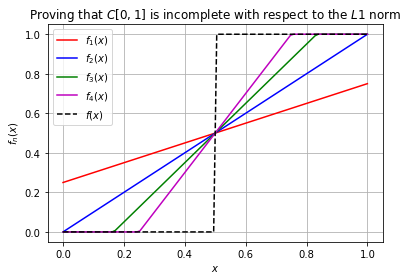

In [8]:
# plotting these sequence of functions

x_vals = np.linspace(0,1,100)
plt.plot(x_vals , function(x_vals , 1) , 'r-' , label = "$f_1(x)$")
plt.plot(x_vals , function(x_vals , 2) , 'b-' , label = "$f_2(x)$")
plt.plot(x_vals , function(x_vals , 3) , 'g-' , label = "$f_3(x)$")
plt.plot(x_vals , function(x_vals , 4) , 'm-' , label = "$f_4(x)$")
plt.plot(x_vals , function(x_vals , 10000) , 'k--' , label = "$f(x)$")
plt.legend()
plt.grid(True)
plt.title("Proving that $C[0,1]$ is incomplete with respect to the $L1$ norm")
plt.xlabel("$x$")
plt.ylabel("$f_n(x)$")
plt.show()

##### Question 3: Entropy of a discrete RV

##### Entropy of a discrete RV $X$ is defined as $H(X) = - \sum\limits_{x\in\mathcal{X}} p(x) \ log$ $p(x)$ where $p(x)$ is the PMF of $X$, and $\mathcal{X}$ is the set of all possible values $X$ can take.

##### a) Write a function that takes a PMF as input and outputs the entropy in bits. 

In [9]:
# writing a function to calculate the entropy of a pmf
def entropy(pmf):
    
    if np.sum(pmf)!= 1.0:
        print("Invalid PMF") # checking for validity of pmf
        return 0
    
    else:
        entropy = 0

        for p in pmf:
            if(p < 0):
                print("Invalid PMF") # checking for validity of pmf
                return 0
            
            elif p==0:
                continue

            else:
                entropy += p * np.log2(p)

        return -entropy


##### b) Use the above function to plot the entropy of $X \sim Bern(p)$ as a function of $p$. Where does this plot attain it's maximum?

In [10]:
# defining a function to obtain Bernoulli PMF 
def bern(p):

    return np.array([p , 1.0 - p])

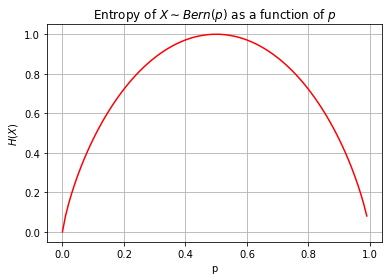

Clearly, the entropy obtains it's maximum value of 1 when X ~ Bern(0.5), which is evident, since there is maximum unpredictability when both success and failure are equally likely. We can see below: 
The values of p for which we obtain a maximum are :[0.5]


In [11]:
p_vals = np.linspace(0,1,100 , endpoint = False)
entropy_vals = []

# obtaining the entropies for different values of p for Bern(p)
for p in p_vals:
    entropy_vals.append(entropy(bern(p)))

# plotting the entropy as a function of p
plt.plot(p_vals , entropy_vals , 'r-')
plt.grid(True)
plt.title("Entropy of $X\sim Bern(p)$ as a function of $p$")
plt.xlabel("p")
plt.ylabel("$H(X)$")
plt.show()

# maximum of plot
print("Clearly, the entropy obtains it's maximum value of 1 when X ~ Bern(0.5), which is evident,"
" since there is maximum unpredictability when both success and failure are equally likely. We can see below: ")

# finding maximum through code
entropy_vals = np.array(entropy_vals)
idx = np.where(entropy_vals == entropy_vals.max()) # finding indices where maximum occurs
print("The values of p for which we obtain a maximum are :{}".format( [p_vals[i] for i in idx[0]]))

##### Question 4: Image Entropy

##### a) Write a function that accepts an image as input and returns its normalised histogram. Note that normalised histogram is found by dividing original histogram by total number of pixels in image. 

In [12]:
def normalised_hist(img_name):
    
    img = plt.imread(img_name)
    hist = np.zeros((256,) , dtype = int) # since pixel intensity can take values between 0 and 255

    # if datattype of array is float 32, we would want it to be uint8 to get exact pixel intensity 
    # and not relative intensity. So, we scale by multiplying by 255 and convert the datatype.
    if img.dtype == np.float32:
        img = img * 255
        img = img.astype(np.uint8)

    # taking count of rows and columns
    (row,column) = img.shape

    # counting pixels of a particular intensity
    for i in range(row):
        for j in range(column):
            hist[img[i][j]] += 1

    # normalising the histogram
    hist = hist/(row*column)

    plt.stem(np.arange(0,256,1), hist , linefmt = 'r-', markerfmt = 'r')
    plt.xlabel("Pixel Intensity")
    plt.ylabel("Normalised Count")
    plt.title("Normalised histogram of {}".format(img_name))
    plt.grid(True)
    plt.show()
    
    return hist

##### b) Use the entropy function from the previous question to find the image entropy. Experiment with different grey scale images.

##### Link for images:  https://sipi.usc.edu/database/database.php?volume=misc

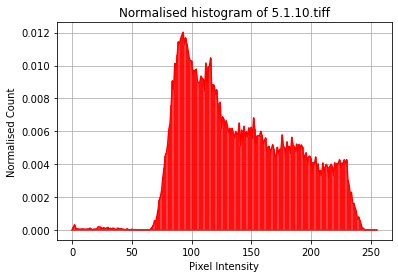

The image entropy of Aerial is:  7.3118072232599625


In [13]:
# entropies for different images
print("The image entropy of Aerial is: ", entropy(normalised_hist("5.1.10.tiff")))


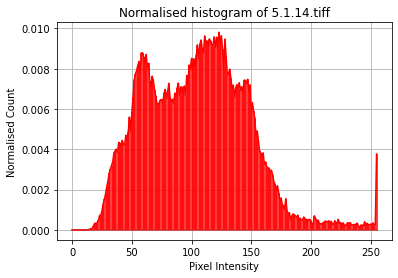

The image entropy of Chemical Plant is:  7.342432512894013


In [14]:
print("The image entropy of Chemical Plant is: ", entropy(normalised_hist("5.1.14.tiff")))

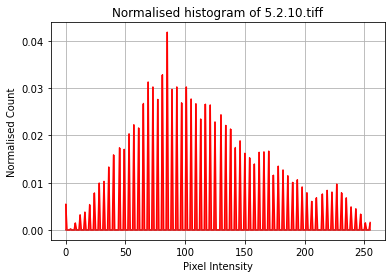

The image entropy of Stream and Bridge is:  5.705560157916679


In [15]:
print("The image entropy of Stream and Bridge is: ", entropy(normalised_hist("5.2.10.tiff")))

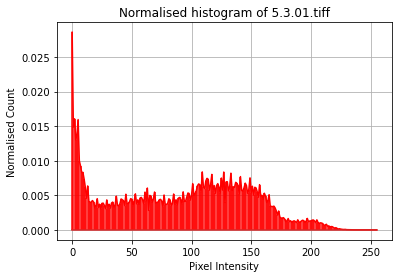

The image entropy of Male is:  7.523736852074143


In [16]:
print("The image entropy of Male is: ", entropy(normalised_hist("5.3.01.tiff")))

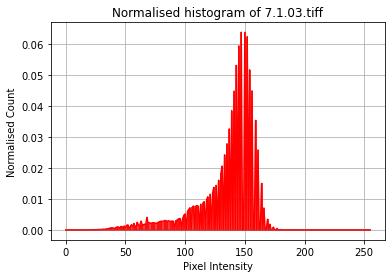

The image entropy of Tank is:  5.495739988888563


In [17]:
print("The image entropy of Tank is: ", entropy(normalised_hist("7.1.03.tiff")))

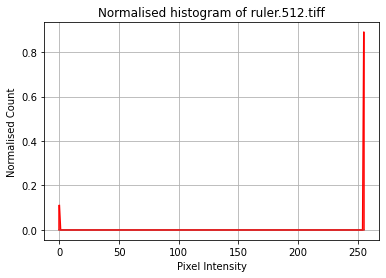

The image entropy of Pixel Ruler is:  0.5000328508849421


In [18]:
print("The image entropy of Pixel Ruler is: ", entropy(normalised_hist("ruler.512.tiff")))

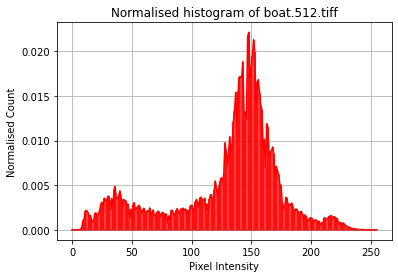

The image entropy of Fishing Boat is:  7.191370218069237


In [19]:
print("The image entropy of Fishing Boat is: ", entropy(normalised_hist("boat.512.tiff")))

In [20]:
# Observations

print("We observe that maximum entropy is for pictures, which have a wide variety of pixel intensities"
",i.e, in terms of colors, we see a wide range of colors between black and white. For example consider "
"the Chemical Plant photo or the Aerial photo, which have a wide spread of pixel intensities. On the other hand, the "
"image with the least entropy, the Pixel ruler photo, has minimum entropy, because of the the use "
"of only black and white colors. Thus, the predictability of the intensity of each pixel increases "
"in case of the Pixel Ruler photo. Hence, we can observe a relation between entropy and predictability.")

We observe that maximum entropy is for pictures, which have a wide variety of pixel intensities,i.e, in terms of colors, we see a wide range of colors between black and white. For example consider the Chemical Plant photo or the Aerial photo, which have a wide spread of pixel intensities. On the other hand, the image with the least entropy, the Pixel ruler photo, has minimum entropy, because of the the use of only black and white colors. Thus, the predictability of the intensity of each pixel increases in case of the Pixel Ruler photo. Hence, we can observe a relation between entropy and predictability.


##### Question 5: Joint PMF and Joint entropy

##### Work with "left.png" and "right.png"

##### a) Write a function that accepts these stereo image pair as input and outputs the normalised joint histogram, and also plots it.

In [21]:
# defining a function to find the normalised joint histogram
def normalised_joint_hist(img1_name , img2_name):

    img1 = plt.imread(img1_name)
    img2 = plt.imread(img2_name)

    # if datattype of array is float 32, we would want it to be uint8 to get exact pixel intensity 
    # and not relative intensity. So, we scale by multiplying by 255 and convert the datatype.
    if img1.dtype == np.float32:
        img1 = img1 * 255
        img1 = img1.astype(np.uint8)
    if img2.dtype == np.float32:
        img2 = img2 * 255
        img2 = img2.astype(np.uint8)

    # obtaining rows and columns
    (row , column) = img1.shape
    
    # since the joint histogram would be of 256*256
    joint_hist = np.zeros((256,256))


    # obtaining count
    # assuming row number refers to pixel intensity of first image and column number refers to intensity of second image
    for i in range(row):
        for j in range(column):
            joint_hist[img1[i][j]][img2[i][j]] += 1

    joint_hist = joint_hist / (row*column)
    

    # plotting the 3D graph
    fig = plt.figure()
    ax = plt.axes(projection = '3d')
    x = np.arange(0,256,1)
    y = np.arange(0,256,1)
    X , Y = np.meshgrid(x,y) # converting into a 2D grid
    ax.stem(X.flatten(),Y.flatten() , joint_hist.flatten() ,linefmt = 'r-', markerfmt = 'r' )
    plt.title("Normalised Joint Histogram of {} and {}".format(img1_name , img2_name))
    plt.show()
    
    return joint_hist


##### b) Write a function that accepts the joint PMF of a pair of random variables as input and outputs the joint entropy.

In [22]:
# function to calculate joint entropy from joint PMF
def joint_entropy(joint_pmf):
    
    joint_entropy = 0

    # obtaining the number of rows and columns
    (row , column) = joint_pmf.shape

    # calculating entropy
    for i in range(row):
        for j in range(column):
            
            p = joint_pmf[i][j]

            if(p < 0):
                print("Invalid PMF")    # checking for validity of PMF
                return 0
            
            elif p == 0 :
                continue

            else:
                joint_entropy += p * np.log2(p)

    return -joint_entropy

##### c) Test the function in part (b) using the joint histogram obtained in part (a).

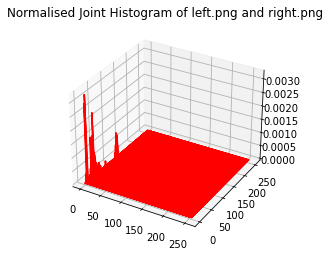

The joint entropy of 'left.png' and 'right.png' is:  13.675203263376206


In [23]:
print("The joint entropy of 'left.png' and 'right.png' is: " , \
    joint_entropy(normalised_joint_hist("left.png" , "right.png")) )

##### Question 6: Conditional PMF and conditional entropy



##### a) Write a function that accepts as input the joint PMF, index of conditioning random variable and value of conditioning random variable, and outputs the apropriate conditional PMF.

In [24]:
def conditional_pmf(joint_pmf , conditioning_rv , val):
    # the conditioning_rv would be X or Y, where X represents the rows and Y represents the columns
    # Y ->|   1   2   3   4
    # X |
    # 1 |
    # 2 |
    # 3 |
    # 4 |

    # Therefore, if conditioning RV is X,and val is x,  we would consider all elements in the row (X = x)
    # Else, if the conditioning RV is Y, and val is y, we would consider all elements in the column (Y = y)

    # According to the joint_hist function, X would represent Image1 and Y would represent Image 2

    if (conditioning_rv == 'X'):
        if(joint_pmf[val , :].sum() != 0):  # check to ensure all probabilities in the array are not 0
            return joint_pmf[val , :] / joint_pmf[val , :].sum()
        else:
            return np.zeros(joint_pmf[val , :].shape)
    
    else:
        if(joint_pmf[: , val].sum() != 0):  # check to ensure all probabilities in the array are not 0
            return joint_pmf[: , val] / joint_pmf[: , val].sum()
        else:
            return np.zeros(joint_pmf[: , val].shape)
        

##### b) Write a function that accepts as input joint PMF, and index of conditioning random variable, and outputs conditional entropy.

In [25]:
def log_ignoring_zero(list):
    # to find log_2 of list, and if it encounters a zero value, the log is returned as zero
    
    for i in range(len(list)):

        if list[i] == 0:
            continue
        else:
            list[i] = np.log2(list[i])

    return list

In [26]:
def conditional_entropy(joint_pmf , conditioning_rv):
    # the conditioning_rv would be X or Y, where X represents the rows and Y represents the columns
    # Y ->|   1   2   3   4
    # X |
    # 1 |
    # 2 |
    # 3 |
    # 4 |

    # Therefore, if conditioning RV is X,and val is x,  we would consider all elements in the row (X = x)
    # Else, if the conditioning RV is Y, and val is y, we would consider all elements in the column (Y = y)

    # According to the joint_hist function, X would represent Image1 and Y would represent Image 2

    conditional_entropy = 0

    if(conditioning_rv == 'X'):
        # since X would take all values in the number of rows
        for val in range(joint_pmf.shape[0]): 
            c_pmf = conditional_pmf(joint_pmf , conditioning_rv , val)
            
            # since conditional entropy is the sum of p(x,y)*log_2(p(y|x)) over all x and y
            # we find the conditional pmf for every value of conditioning random variable, and take a dot product
            # with the corresponding row or column in joint pmf
            conditional_entropy += joint_pmf[val , :] @ log_ignoring_zero(c_pmf)

    else:
        # since Y would take all values in the number of columns
        for val in range(joint_pmf.shape[1]): 
            c_pmf = conditional_pmf(joint_pmf , conditioning_rv , val)
            
            # since conditional entropy is the sum of p(x,y)*log_2(p(y|x)) over all x and y
            # we find the conditional pmf for every value of conditioning random variable, and take a dot product
            # with the corresponding row or column in joint pmf
            conditional_entropy += joint_pmf[: , val] @ log_ignoring_zero(c_pmf)

    return -conditional_entropy


##### c) Test this conditional entropy function using the normalised joint histogram obtained in 4(a) for your choice of conditioning random variable and value.

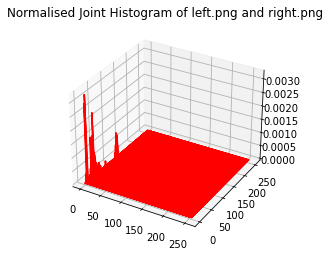

The conditional entropy of 'right.png' with respect to 'left.png' is 6.416909158632364


In [27]:
print("The conditional entropy of 'right.png' with respect to 'left.png' is {}".\
    format(conditional_entropy(normalised_joint_hist("left.png" , "right.png") , 'X')))

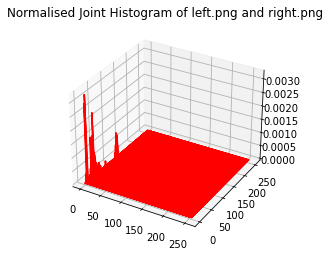

The conditional entropy of 'left.png' with respect to 'right.png' is 6.39657773168618


In [28]:
print("The conditional entropy of 'left.png' with respect to 'right.png' is {}".\
    format(conditional_entropy(normalised_joint_hist("left.png" , "right.png") , 'Y')))

##### Question 7: KL Divergence

##### For PMFs $p$ and $q$ defined on $\mathcal{X}$, $D(p||q) \geq 0$ and $D(p||q) \neq D(q||p)$

##### a) Write a function that accepts two PMFs $p$ and $q$ as input, and outputs $D(p||q)$

In [29]:
def kl_div(p , q):
    
    div = 0

    # the length of p and q is the same, as they take values for the same random variable
    for i in range(len(p)):
        
        if p[i] < 0 or q[i] < 0:
            print("Invalid PMFs")   # checking for validity
            return 0
        
        elif p[i] == 0 or q[i]==0:
            continue

        else:
            div += p[i] * np.log2(p[i]/q[i])

    return div


##### b) Let $p \sim Bern(r)$ and $q \sim Bern(s)$. For a fixed value of $r$, vary $s$ and:
##### (i) Plot $D(p||q)$ and $D(q||p)$
##### (ii) Verify $D(p||q)$ and $D(q||p)$ are both non-negative.
##### (iii) Verify $D(p||q) \neq D(q||p)$, and are equal only when $r = s$

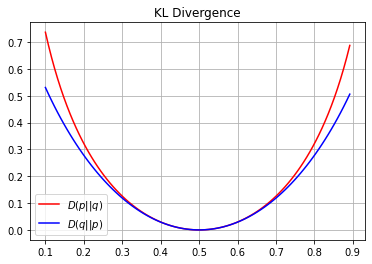

In [42]:
# fixing r = 0.5
r = 0.5

s_vals = np.linspace(0.1, 0.9 , 100 , endpoint = False) # since at 0 and 1, Bern(s) = 0, for which KL Divergence is not defined
 
D_pq = [kl_div(bern(r) , bern(s)) for s in s_vals]  # D(p||q)
D_qp = [kl_div(bern(s) , bern(r)) for s in s_vals]  # D(q||p)

plt.plot(s_vals, D_pq , 'r-' , label = "$D(p||q)$")
plt.plot(s_vals , D_qp , 'b-' , label = "$D(q||p)$")
plt.grid(True)
plt.legend()
plt.title("KL Divergence")
plt.show()



In [43]:
# verifying non-negativity
D_pq = np.array(D_pq)
D_qp = np.array(D_qp)
print("D(p||q) is non-negative is supported by the fact:\n", D_pq>=0)

print("D(q||p) is non-negative is supported by the fact: \n" , D_qp >= 0)

D(p||q) is non-negative is supported by the fact:
 [ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True]
D(q||p) is non-negative is supported by the fact: 
 [ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  

In [44]:
print("D(p||q) is not equal to D(q||p) is shown by the fact: \n", D_pq == D_qp)

print("\nHowever, from the graph, as well as the previous array, we see that D(p||q)  = D(q||p) only in one case."
" Thus, we obtain this value of s.")

idx = np.where(D_pq == D_qp)

print("\nD(p||q) is the least when s is {}, which is equal to r. Also, when s = r , the value of D(p||q) is {}".\
    format([s_vals[i] for i in idx[0]] , [D_pq[i] for i in idx[0]] ))

D(p||q) is not equal to D(q||p) is shown by the fact: 
 [False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False  True False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False]

However, from the graph, as well as the previous array, we see that D(p||q)  = D(q||p) only in one case. Thus, we obtain this value of s.

D(p||q) is the least when s is [0.5], which is equal to r. Also, when s = r , the value of D(p||q) is [0.0]



##### (iv) Find $D(p||q)$ and $D(q||p)$ where $p$ and $q$ are the normalised histograms of "left. png" and "right.png". Do you think KL Divergence is a good metric for image similarity?

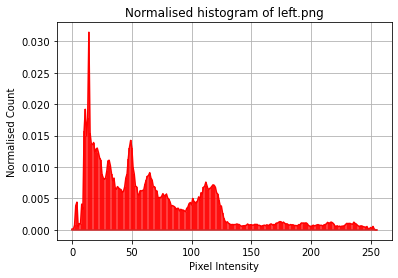

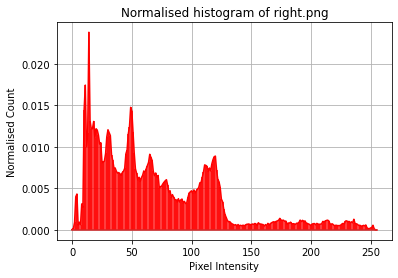

D(p||q) = 0.015104015237387055
D(q||p) = 0.014409785833354494
I believe KL Divergence is not such a good metric to measure image similarity because it only takes into account the pixel intensity distribution, and now how they are distributed over the image.


In [45]:
p = normalised_hist("left.png")
q = normalised_hist("right.png")

print("D(p||q) = {}".format(kl_div(p,q)))
print("D(q||p) = {}".format(kl_div(q,p)))

print("I believe KL Divergence is not such a good metric to measure image similarity because "
 "it only takes into account the pixel intensity distribution, and now how they are distributed over the image.")